# Easily export jupyter cells to python module
https://github.com/fastai/course-v3/blob/master/nbs/dl2/notebook2script.py

In [ ]:
! python /tf/src/scripts/notebook2script.py visualization.ipynb

In [1]:
%matplotlib inline

In [ ]:
! pip install -U scikit-learn

In [2]:
#export
from exp.nb_clustering import *
from exp.nb_evaluation import *
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cmx
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

In [3]:
cd /tf/src/data/features

/tf/src/data/features


# Generate all the feature vectors
(Skip if already done)


In [ ]:
embdr = D2VEmbedder("/tf/src/data/doc2vec/model")

In [ ]:
# Generate and Save Human Features
hman_dict = embdr("/tf/src/data/methods/DATA00M_[god-r]/test")

with open('hman_features.pickle', 'wb') as f:
    pickle.dump(hman_dict, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Generate and Save GPT-2 Pretrained Features
m1_dict = embdr("/tf/src/data/samples/unconditional/m1_example")

with open('m1_features.pickle', 'wb') as f:
    pickle.dump(m1_dict, f, protocol=pickle.HIGHEST_PROTOCOL)

# Read in Feature Vectors

In [4]:
models_path = "/tf/src/data/features/output_space"
models_features = load_features(models_path)

In [5]:
len(models_features[0]), len(models_features[1])

(96626, 100)

# Visualize Features

In [64]:
dims = 2
models_clusters = cluster(models_features, k_range = [2, 3, 4, 5], dims = 2)

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 3.040752
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.940933
[t-SNE] KL divergence after 300 iterations: 0.934385
Best K was 3 with a silhouette score of 0.3131982
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 5.540578
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.307167
[t-SNE] KL divergence after 300 iterations: 0.967118
Best K was 3 with a silhouette score of 0.31246203


In [65]:
def setup_data(model):
    feature_vectors, _, _, centroids, kmeans = model
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = feature_vectors[:, 0].min() - 1, feature_vectors[:, 0].max() + 1
    y_min, y_max = feature_vectors[:, 1].min() - 1, feature_vectors[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    return feature_vectors, centroids, xx, yy, Z

In [66]:
def plot_features(models_clusters, export = True):
    plt.figure(figsize=(12, 8))
    # Create 2x2 sub plots
    gs = gridspec.GridSpec(2, 2)
    plt.clf()
    for i, model in enumerate(models_clusters):
        # Setup data to be plotted
        feature_vectors, centroids, xx, yy, Z = setup_data(model)
        
        # Plot data
        plt.subplot(gs[0, i])
        plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

        plt.plot(feature_vectors[:, 0], feature_vectors[:, 1], 'k.', markersize=2)
        # Plot the centroids as a white X
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=169, linewidths=3,
                    color='w', zorder=10)
        plt.title('K-means clustering\n'
                  '(PCA & T-SNE - reduced data)\n'
                  'Centroids are marked with white cross')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        
    plt.subplot(gs[1, :])
    colmap = {0: 'b.', 1: 'r.'}
    plt.title('Blue denotes Human Methods and Red denotes GPT-2 Unconditional Samples')
    for i, model in enumerate(models_clusters):
        feature_vectors, _, _, _ = model
        plt.plot(feature_vectors[:, 0], feature_vectors[:, 1], colmap[i], markersize=10)
        
    if export:
        if not os.path.exists('images/'): os.mkdir('images/')
        plt.savefig('images/feature_vectors_scatter_plot.png', dpi=100, format='png')
    plt.show()

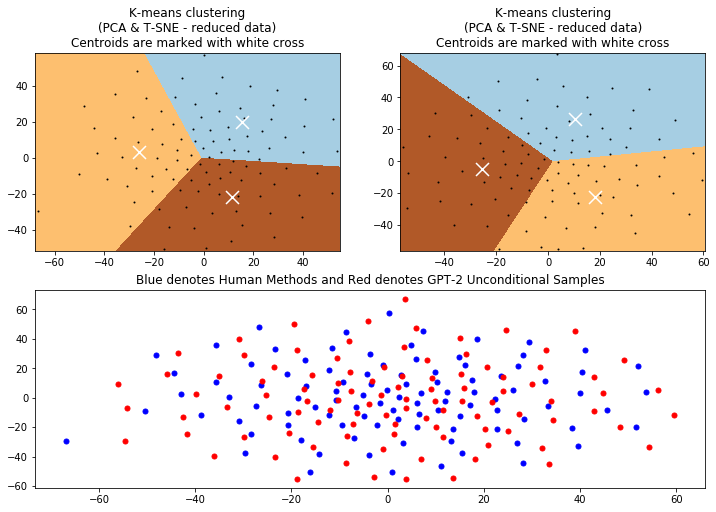

In [67]:
plot_features(models_clusters)

# Gaussian Mixture Visualization

## Visualize 1D

In [49]:
dims = 1
models_clusters = cluster(models_features, k_range = [2, 3, 4, 5], dims = dims)

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 3.040752
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.936195
[t-SNE] KL divergence after 300 iterations: 0.757610
Best K was 3 with a silhouette score of 0.6141684
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 5.540578
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.741875
[t-SNE] KL divergence after 300 iterations: 0.672689
Best K was 2 with a silhouette score of 0.87282944


In [52]:
def plot_gmm_1d(models_clusters, export = True):
    plt.figure(figsize=(12, 8))
    # Create 2x2 sub plots
    gs = gridspec.GridSpec(1, 2)
    plt.clf()
    for i, model in enumerate(models_clusters):
        feature_vectors, _, _, kmeans = model
        gmm = generate_distributions(feature_vectors, kmeans.n_clusters - 1)
        x_min, x_max = feature_vectors[:, 0].min(), feature_vectors[:, 0].max()
        
        # Plot Data
        plt.subplot(gs[0, i])
        
        delta = 10
        x = np.linspace(x_min - delta, x_max + delta, 1000).reshape(1000,1)
        logprob = gmm.score_samples(x)
        pdf = np.exp(logprob)
        plt.plot(x, pdf, '-k')
        
    if export:
        if not os.path.exists('images/'): os.mkdir('images/')
        plt.savefig('images/1D_GMM_demonstration.png', dpi=100, format='png')
        
    plt.show()

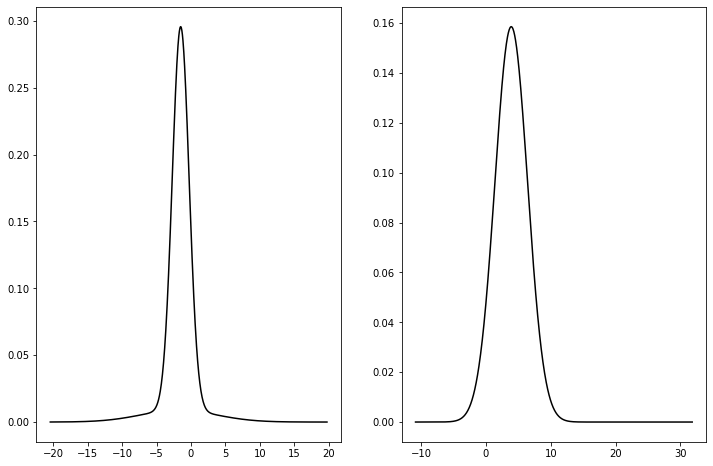

In [53]:
plot_gmm_1d(models_clusters)

## Visualize 2D

In [54]:
dims = 2
models_clusters = cluster(models_features, k_range = [2, 3, 4, 5], dims = dims)

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 3.040752
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.587074
[t-SNE] KL divergence after 300 iterations: 1.083076
Best K was 3 with a silhouette score of 0.3245396
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 5.540578
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.750435
[t-SNE] KL divergence after 300 iterations: 1.019413
Best K was 5 with a silhouette score of 0.326521


In [55]:
# From http://www.itzikbs.com/gaussian-mixture-model-gmm-3d-point-cloud-classification-primer
def visualize_2D_gmm(points, w, mu, stdev, id, export=True):
    '''
    plots points and their corresponding gmm model in 2D
    Input: 
        points: N X 2, sampled points
        w: n_gaussians, gmm weights
        mu: 2 X n_gaussians, gmm means
        stdev: 2 X n_gaussians, gmm standard deviation (assuming diagonal covariance matrix)
    Output:
        None
    '''
    n_gaussians = mu.shape[1]
    N = int(np.round(points.shape[0] / n_gaussians))
    # Visualize data
#     fig = plt.figure(figsize=(8, 8))
    axes = plt.gca()
    plt.set_cmap('Set1')
    colors = cmx.Set1(np.linspace(0, 1, n_gaussians))
    for i in range(n_gaussians):
        idx = range(i * N, (i + 1) * N)
        plt.scatter(points[idx, 0], points[idx, 1], alpha=0.3, c=colors[i])
        for j in range(8):
            axes.add_patch(
                patches.Ellipse(mu[:, i], width=(j+1) * stdev[0, i], height=(j+1) *  stdev[1, i], fill=False, color=colors[i]))
        plt.title('GMM ' + str(id))
    plt.xlabel('X')
    plt.ylabel('Y')

In [56]:
def plot_gmm_2d(models_clusters, export = True):
    plt.figure(figsize=(12, 8))
    # Create 2x2 sub plots
    gs = gridspec.GridSpec(1, 2)
    plt.clf()
    for i, model in enumerate(models_clusters):
        feature_vectors, _, _, kmeans = model
        gmm = generate_distributions(feature_vectors, kmeans.n_clusters - 1)
        
        # Plot Data
        plt.subplot(gs[0, i])
        visualize_2D_gmm(feature_vectors, gmm.weights_, gmm.means_.T, np.sqrt(gmm.covariances_).T, i)
        
    if export:
        if not os.path.exists('images/'): os.mkdir('images/')
        plt.savefig('images/2D_GMM_demonstration.png', dpi=100, format='png')
    plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

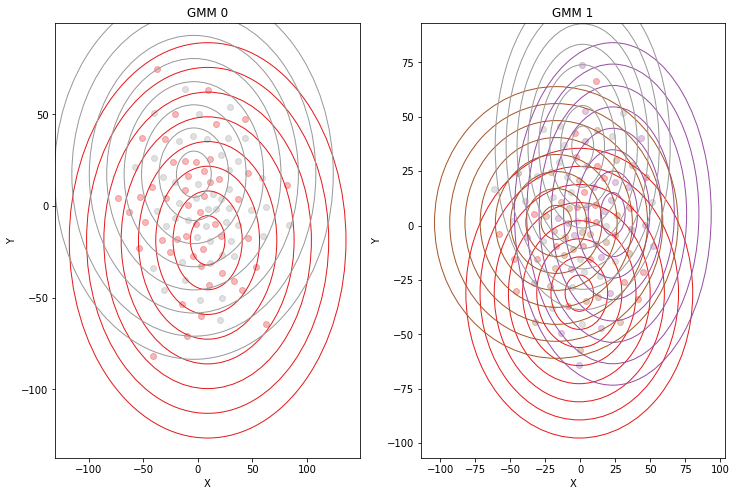

In [57]:
plot_gmm_2d(models_clusters)

## Visualize 3D

In [58]:
dims = 3
models_clusters = cluster(models_features, k_range = [2, 3, 4, 5], dims = dims)

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 3.040752
[t-SNE] KL divergence after 250 iterations with early exaggeration: 160.454865
[t-SNE] KL divergence after 300 iterations: 3.340936
Best K was 2 with a silhouette score of 0.6622582
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 5.540578
[t-SNE] KL divergence after 250 iterations with early exaggeration: 137.538498
[t-SNE] KL divergence after 300 iterations: 2.466228
Best K was 2 with a silhouette score of 0.7663881


In [59]:
# From http://www.itzikbs.com/gaussian-mixture-model-gmm-3d-point-cloud-classification-primer
def plot_sphere(w=0, c=[0,0,0], r=[1, 1, 1], subdev=10, ax=None, sigma_multiplier=3):
    '''
        plot a sphere surface
        Input: 
            c: 3 elements list, sphere center
            r: 3 element list, sphere original scale in each axis ( allowing to draw elipsoids)
            subdiv: scalar, number of subdivisions (subdivision^2 points sampled on the surface)
            ax: optional pyplot axis object to plot the sphere in.
            sigma_multiplier: sphere additional scale (choosing an std value when plotting gaussians)
        Output:
            ax: pyplot axis object
    '''

    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    pi = np.pi
    cos = np.cos
    sin = np.sin
    phi, theta = np.mgrid[0.0:pi:complex(0,subdev), 0.0:2.0 * pi:complex(0,subdev)]
    x = sigma_multiplier*r[0] * sin(phi) * cos(theta) + c[0]
    y = sigma_multiplier*r[1] * sin(phi) * sin(theta) + c[1]
    z = sigma_multiplier*r[2] * cos(phi) + c[2]
    cmap = cmx.ScalarMappable()
    cmap.set_cmap('jet')
    c = cmap.to_rgba(w)

    ax.plot_surface(x, y, z, color=c, alpha=0.2, linewidth=1)

    return ax

In [60]:
# From http://www.itzikbs.com/gaussian-mixture-model-gmm-3d-point-cloud-classification-primer
def visualize_3d_gmm(points, w, mu, stdev, id, axes, export=True):
    '''
    plots points and their corresponding gmm model in 3D
    Input: 
        points: N X 3, sampled points
        w: n_gaussians, gmm weights
        mu: 3 X n_gaussians, gmm means
        stdev: 3 X n_gaussians, gmm standard deviation (assuming diagonal covariance matrix)
    Output:
        None
    '''

    n_gaussians = mu.shape[1]
    N = int(np.round(points.shape[0] / n_gaussians))
    # Visualize data
    plt.set_cmap('Set1')
    colors = cmx.Set1(np.linspace(0, 1, n_gaussians))
    for i in range(n_gaussians):
        idx = range(i * N, (i + 1) * N)
        axes.scatter(points[idx, 0], points[idx, 1], points[idx, 2], alpha=0.3, c=colors[i])
        plot_sphere(w=w[i], c=mu[:, i], r=stdev[:, i], ax=axes)

    plt.title('3D GMM')
    axes.set_xlabel('X')
    axes.set_ylabel('Y')
    axes.set_zlabel('Z')
    axes.view_init(35.246, 45)

In [61]:
def plot_gmm_3d(models_clusters, export = True):
    # set up a figure twice as wide as it is tall
    fig = plt.figure(figsize=plt.figaspect(0.5))
    
    for i, model in enumerate(models_clusters):
        feature_vectors, _, _, kmeans = model
        gmm = generate_distributions(feature_vectors, kmeans.n_clusters - 1)
        
        # Plot Data
        axes = fig.add_subplot(121 + i, projection='3d')
        visualize_3d_gmm(feature_vectors, gmm.weights_, gmm.means_.T, np.sqrt(gmm.covariances_).T, i, axes)
    
    if export:
        if not os.path.exists('images/'): os.mkdir('images/')
        plt.savefig('images/3D_GMM_demonstration.png', dpi=100, format='png')
    plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


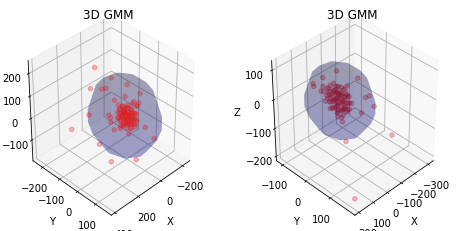

In [62]:
plot_gmm_3d(models_clusters)